<a href="https://colab.research.google.com/github/aalem90/Data-Analyst-Project/blob/main/Machine%20Learning/Week13_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving facies_data2.csv to facies_data2.csv
User uploaded file "facies_data2.csv" with length 196104 bytes


In [2]:
import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#from sklearn.cluster import KMeans, AgglomerativeClustering
#from sklearn.mixture import GaussianMixture
#from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Load your CSV (adjust filename)
df = pd.read_csv("facies_data2.csv")


   Facies Formation  Well Name   Depth     GR  ILD_log10  DeltaPHI   PHIND  \
0       3     A1 SH  SHRIMPLIN  2793.0  77.45      0.664       9.9  11.915   
1       3     A1 SH  SHRIMPLIN  2793.5  78.26      0.661      14.2  12.565   
2       3     A1 SH  SHRIMPLIN  2794.0  79.05      0.658      14.8  13.050   
3       3     A1 SH  SHRIMPLIN  2794.5  86.10      0.655      13.9  13.115   
4       3     A1 SH  SHRIMPLIN  2795.0  74.58      0.647      13.5  13.300   

    PE  NM_M  RELPOS  
0  4.6     1   1.000  
1  4.1     1   0.979  
2  3.6     1   0.957  
3  3.5     1   0.936  
4  3.4     1   0.915  
Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'],
      dtype='object')
            Facies        Depth           GR    ILD_log10     DeltaPHI  \
count  3232.000000  3232.000000  3232.000000  3232.000000  3232.000000   
mean      4.422030  2875.824567    66.135769     0.642719     3.559642   
std       2.504243   131.

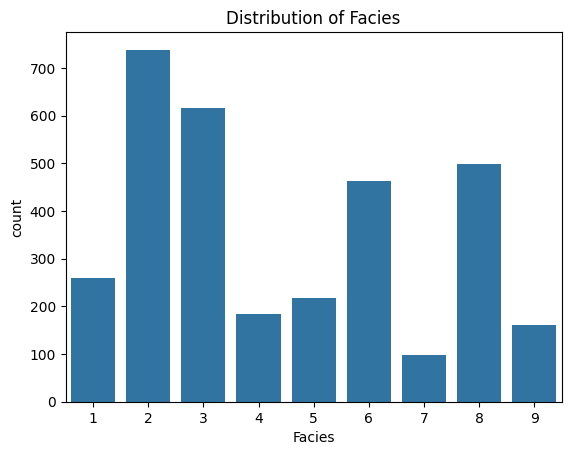

In [4]:
# EDA

print(df.head())
print(df.columns)
print(df.describe())
sns.countplot(data=df, x='Facies')
plt.title('Distribution of Facies')
plt.show()

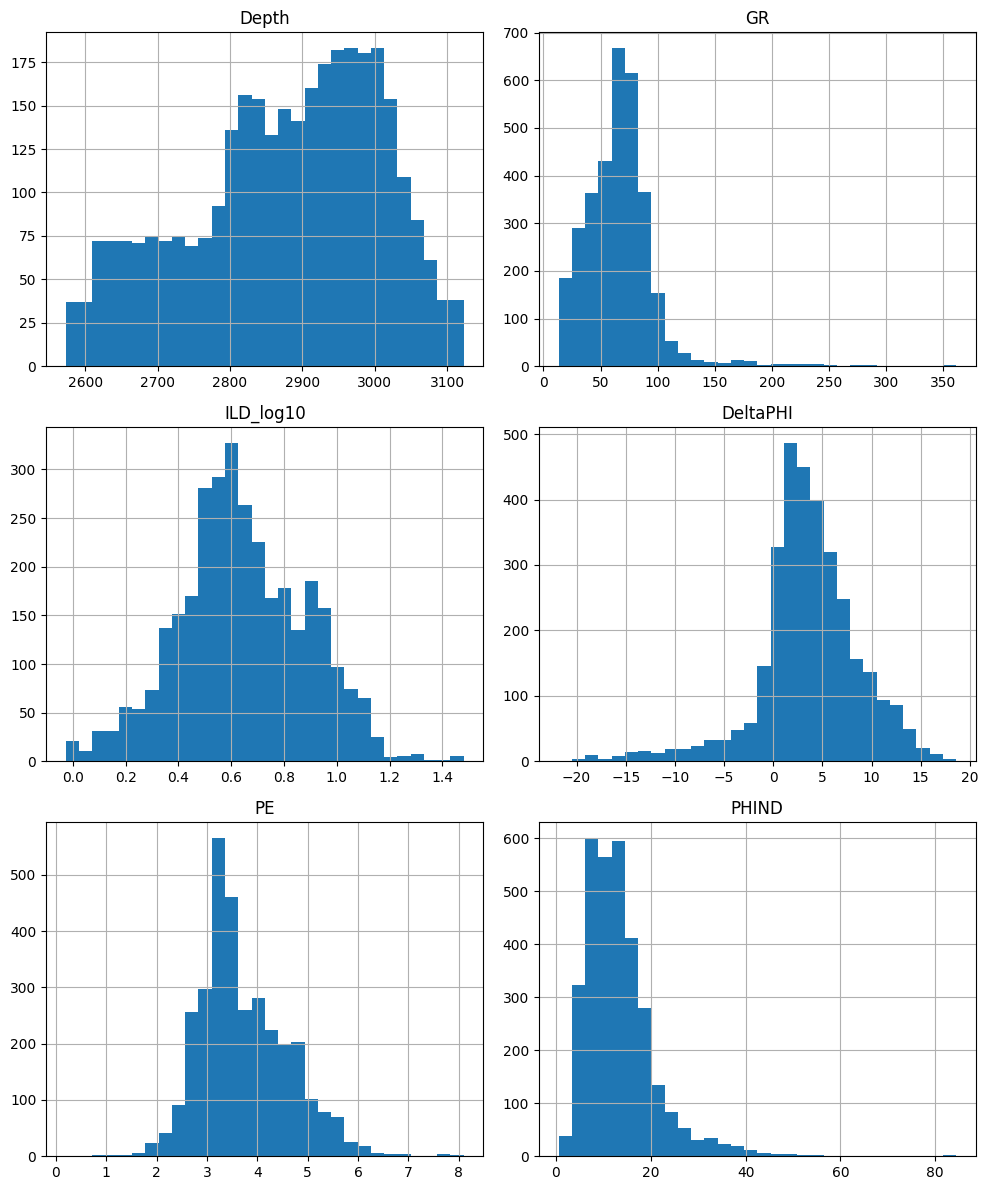

In [5]:
stat=df[['Depth','GR','ILD_log10','DeltaPHI','PE','PHIND']]
stat.hist(figsize=(10, 12), bins=30)
plt.tight_layout()
plt.show()

<Axes: >

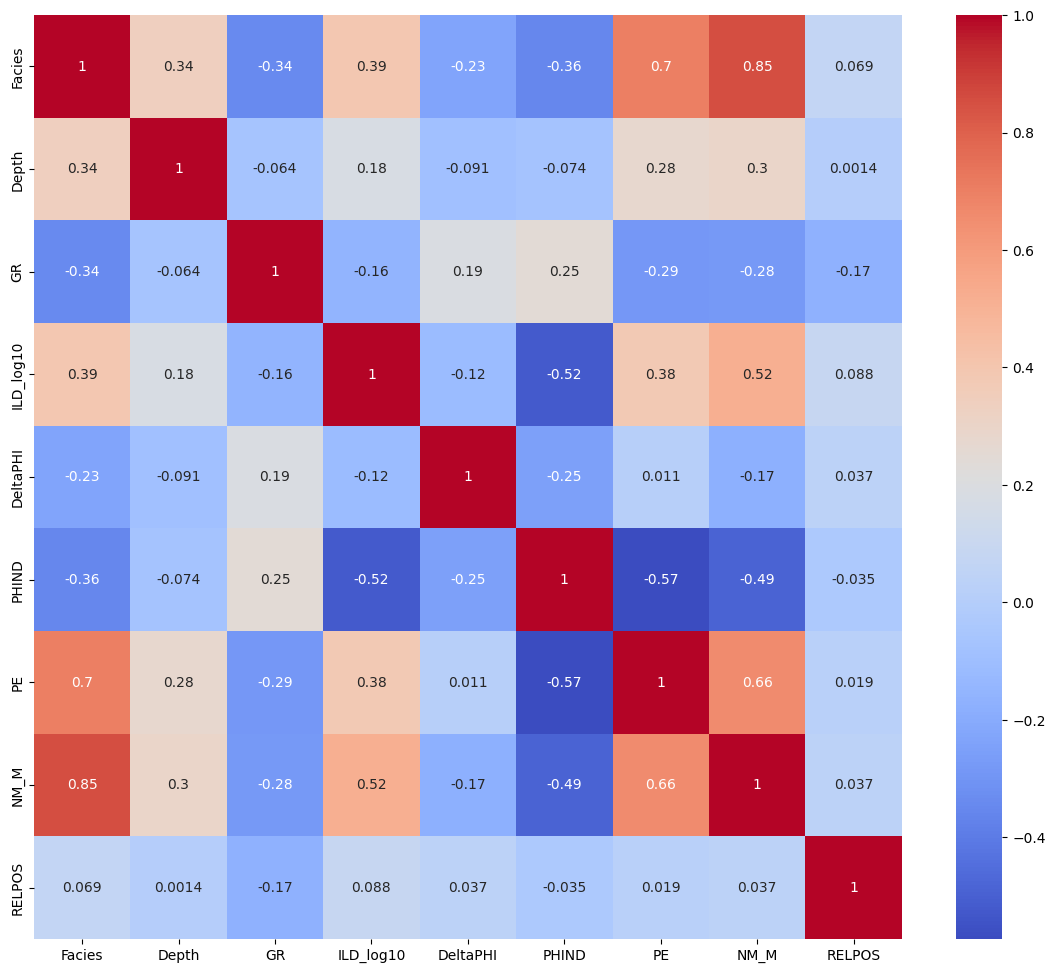

In [6]:
#Feature analysis
corr = df.corr(method='pearson', numeric_only=True) #Correlation data matrix
plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap="coolwarm", annot=True)



In [7]:
#Data Preprocessing for plotting
df = df.sort_values("Depth").reset_index(drop=True)

depth = df["Depth"]
GR    = df["GR"]
ILD_log10 = df["ILD_log10"]
DeltaPHI = df["DeltaPHI"]
PHIND = df["PHIND"]
PE = df["PE"]



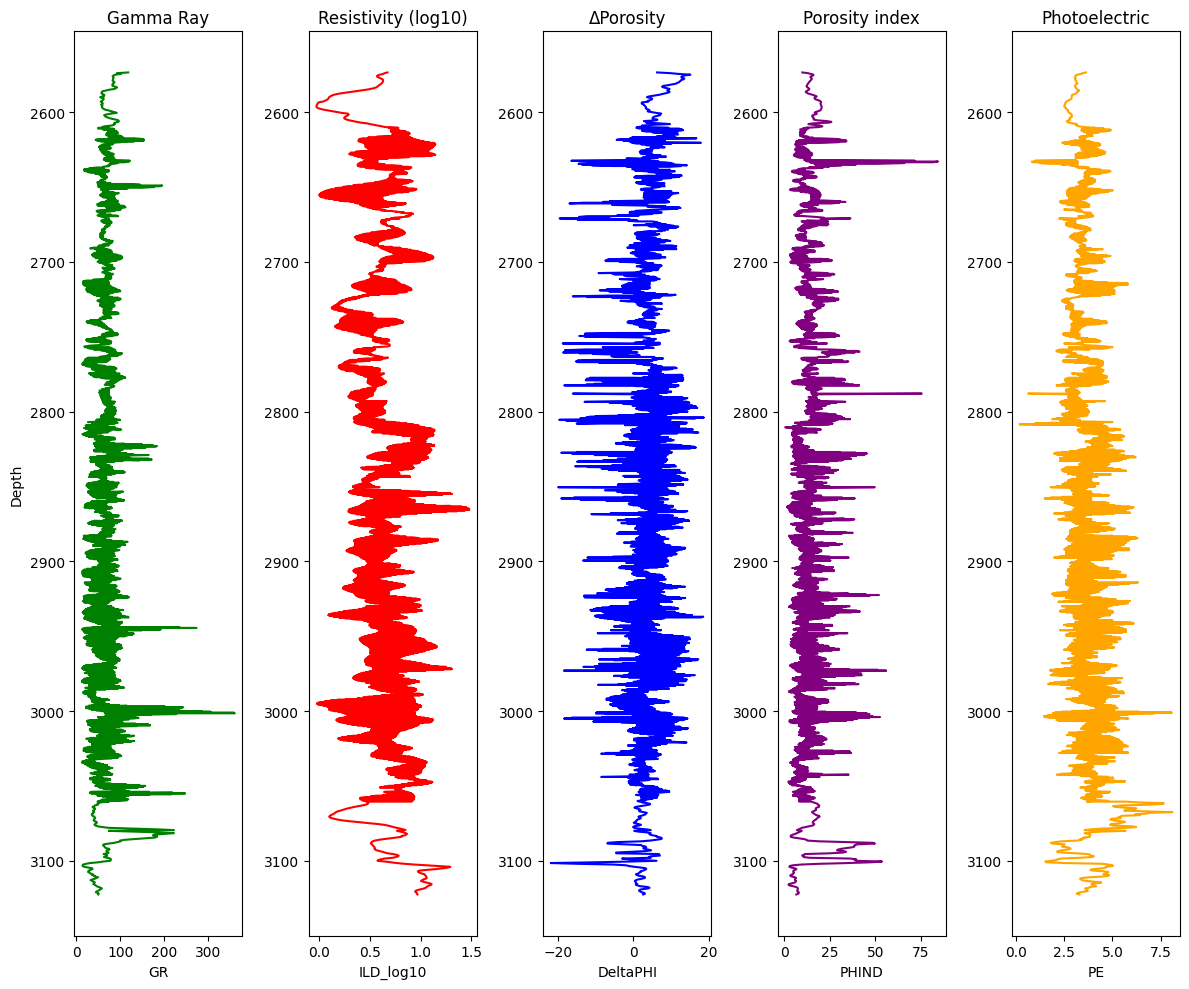

In [8]:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(12, 10))

ax1.plot(GR, depth, color="green")
ax1.set_xlabel("GR")
ax1.invert_yaxis()
ax1.set_ylabel("Depth")
ax1.set_title("Gamma Ray")

ax2.plot(ILD_log10, depth, color="red")
ax2.invert_yaxis()
ax2.set_xlabel("ILD_log10")
ax2.set_title("Resistivity (log10)")

ax3.plot(DeltaPHI, depth, color="blue")
ax3.invert_yaxis()
ax3.set_xlabel("DeltaPHI")
ax3.set_title("ΔPorosity")

ax4.plot(PHIND, depth, color="purple")
ax4.invert_yaxis()
ax4.set_xlabel("PHIND")
ax4.set_title("Porosity index")

ax5.plot(PE, depth, color="orange")
ax5.invert_yaxis()
ax5.set_xlabel("PE")
ax5.set_title("Photoelectric")
plt.tight_layout()

plt.show()



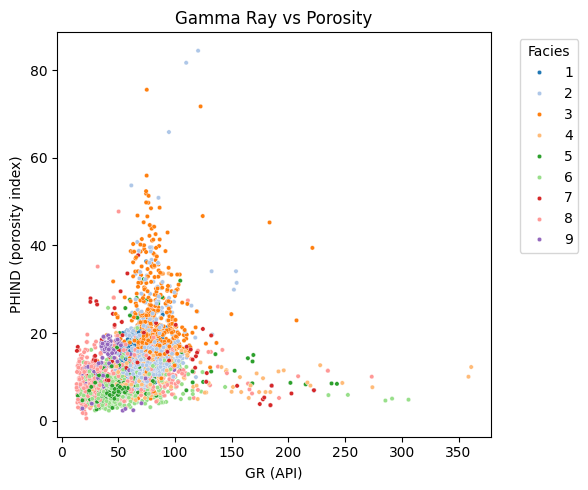

In [9]:
# porosity vs resistivity
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x="GR",
    y="PHIND",
    hue="Facies",      # atau "cluster_km"
    palette="tab20",
    s=10
)
plt.xlabel("GR (API)")
plt.ylabel("PHIND (porosity index)")
plt.title("Gamma Ray vs Porosity")
plt.legend(title="Facies", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## Interpretasi: GR rendah + PHIND tinggi → clean, porous sands; GR tinggi + PHIND rendah → shale/tight zone.


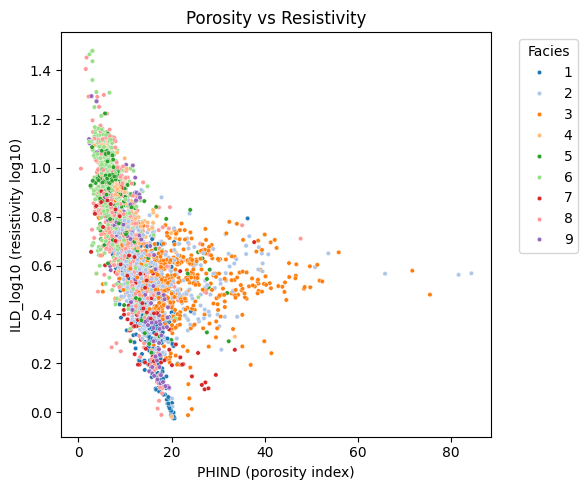

In [10]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x="PHIND",
    y="ILD_log10",
    hue="Facies",      # ganti "Facies" -> "cluster_km" untuk lihat hasil ML
    palette="tab20",
    s=10
)
plt.xlabel("PHIND (porosity index)")
plt.ylabel("ILD_log10 (resistivity log10)")
plt.title("Porosity vs Resistivity")
plt.legend(title="Facies", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## Interpretasi: zona porositas tinggi + resistivity tinggi → kandidat reservoir hidrokarbon; porositas tinggi + resistivity rendah → water‑bearing.



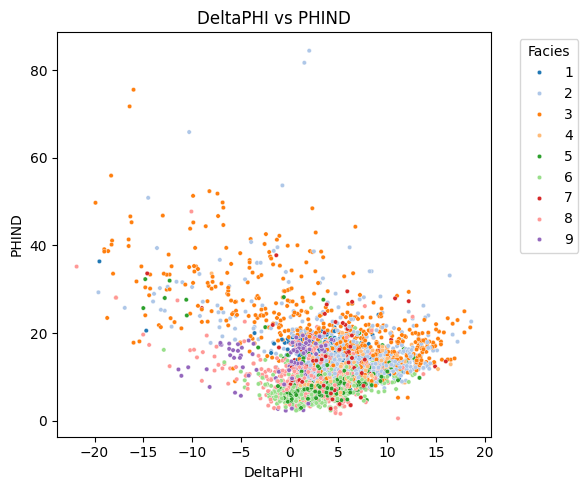

In [11]:
#litologi & gas effect

plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x="DeltaPHI",
    y="PHIND",
    hue="Facies",      # atau "cluster_km"
    palette="tab20",
    s=10
)
plt.xlabel("DeltaPHI")
plt.ylabel("PHIND")
plt.title("DeltaPHI vs PHIND")
plt.legend(title="Facies", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


##Interpretasi: kombinasi DeltaPHI–PHIND membantu membedakan litologi (sand vs limestone vs dolomite) dan melihat efek gas.



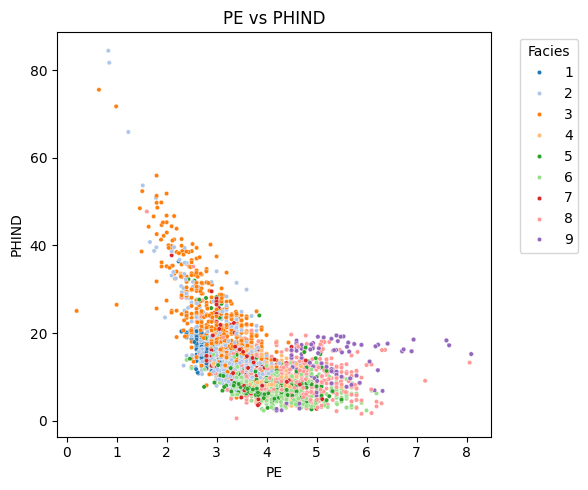

In [12]:
#PE vs PHIND (photoelectric vs porosity)
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x="PE",
    y="PHIND",
    hue="Facies",      # atau "cluster_km"
    palette="tab20",
    s=10
)
plt.xlabel("PE")
plt.ylabel("PHIND")
plt.title("PE vs PHIND")
plt.legend(title="Facies", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

#Interpretasi: PE sensitif ke mineralogi; kombinasi dengan porositas membantu memisahkan lithofacies (misalnya carbonate vs clastics).


**ML MODEL**

In [13]:
# add feature list for clustering
features = ["GR", "ILD_log10", "DeltaPHI", "PHIND", "PE"]

#Filter data model
df = df[features + ['Depth']].dropna()

#Input for training
X = df[features]

In [14]:
#Prepare data for ML and scale feature

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # scaled features

In [15]:
#model training
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

n_rock = 4  # number of rock types

# 1) K-Means
kmeans = KMeans(n_clusters=n_rock, random_state=42, n_init=20)
labels_km = kmeans.fit_predict(X_scaled)
df["RT_km"] = labels_km


# 2) Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_rock, covariance_type="full", random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)
df["RT_gmm"] = labels_gmm


# 3) Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=n_rock, linkage="ward", metric="euclidean")
labels_agg = agg.fit_predict(X_scaled)
df["RT_agg"] = labels_agg


In [16]:
df.head()

,GR,ILD_log10,DeltaPHI,PHIND,PE,Depth,RT_km,RT_gmm,RT_agg
0,118.439,0.674494,6.3,9.95,3.631,2573.5,1,3,1
1,92.550,0.645226,9.9,13.05,3.450,2574.0,1,1,1
2,102.168,0.630021,12.0,14.50,3.364,2574.5,1,1,1
3,88.898,0.600319,15.1,16.05,3.187,2575.0,1,1,1
4,85.493,0.578639,13.6,15.90,3.099,2575.5,1,1,1


In [17]:
#Model Evaluation
from sklearn.metrics import silhouette_score

sil_km = silhouette_score(X_scaled, labels_km)
sil_gmm = silhouette_score(X_scaled, labels_gmm)
sil_agg = silhouette_score(X_scaled, labels_agg)

results = pd.DataFrame({
    "Model": ["KMeans", "GMM", "Agglomerative"],
    "Silhouette": [sil_km, sil_gmm, sil_agg]
})
print(results)


           Model  Silhouette
0         KMeans    0.346520
1            GMM    0.277167
2  Agglomerative    0.322445


In [18]:
#model training
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

n_clusters = 4  # number of rock types

# 1) K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20)
labels_km = kmeans.fit_predict(X_scaled)
df["RT_km"] = labels_km
sil_km = silhouette_score(X_scaled, labels_km)

# 2) Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, covariance_type="full", random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)
df["RT_gmm"] = labels_gmm
sil_gmm = silhouette_score(X_scaled, labels_gmm)

# 3) Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward", metric="euclidean")
labels_agg = agg.fit_predict(X_scaled)
df["RT_agg"] = labels_agg
sil_agg = silhouette_score(X_scaled, labels_agg)


In [19]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["KMeans", "GMM", "Agglomerative"],
    "Silhouette": [sil_km, sil_gmm, sil_agg]
})
print(results)


           Model  Silhouette
0         KMeans    0.346520
1            GMM    0.277167
2  Agglomerative    0.322445


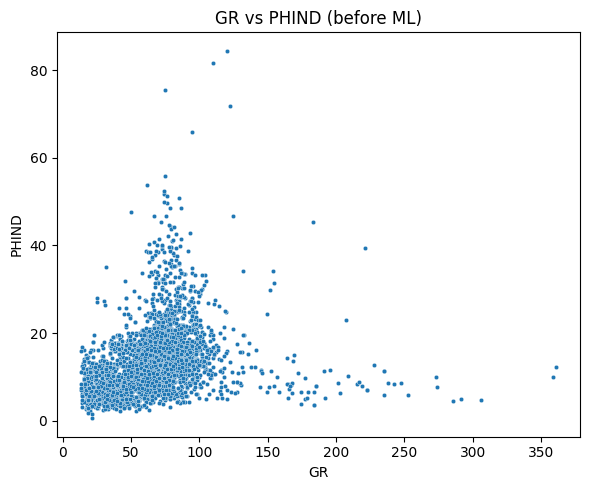

In [20]:
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=df["GR"],
    y=df["PHIND"],
    s=10
)
plt.xlabel("GR")
plt.ylabel("PHIND")
plt.title("GR vs PHIND (before ML)")
plt.tight_layout()
plt.show()


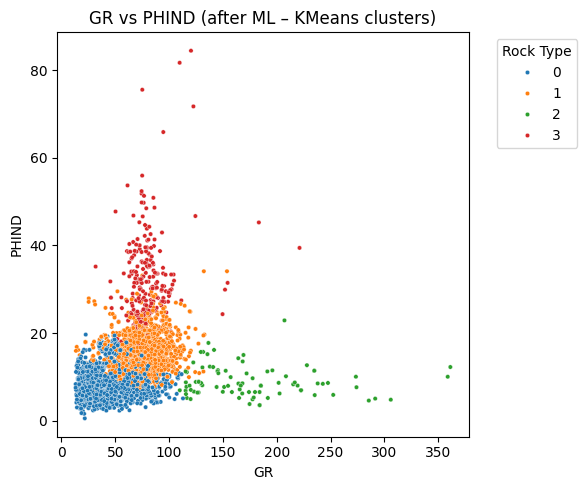

In [21]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=df["GR"],
    y=df["PHIND"],
    hue=df["RT_km"],
    palette="tab10",
    s=10
)
plt.xlabel("GR")
plt.ylabel("PHIND")
plt.title("GR vs PHIND (after ML – KMeans clusters)")
plt.legend(title="Rock Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Hasil analisis ini adalah


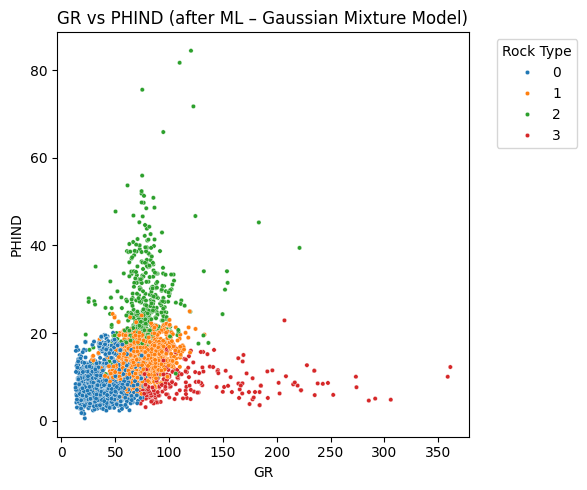

In [22]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=df["GR"],
    y=df["PHIND"],
    hue=df["RT_gmm"],
    palette="tab10",
    s=10
)
plt.xlabel("GR")
plt.ylabel("PHIND")
plt.title("GR vs PHIND (after ML – Gaussian Mixture Model)")
plt.legend(title="Rock Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


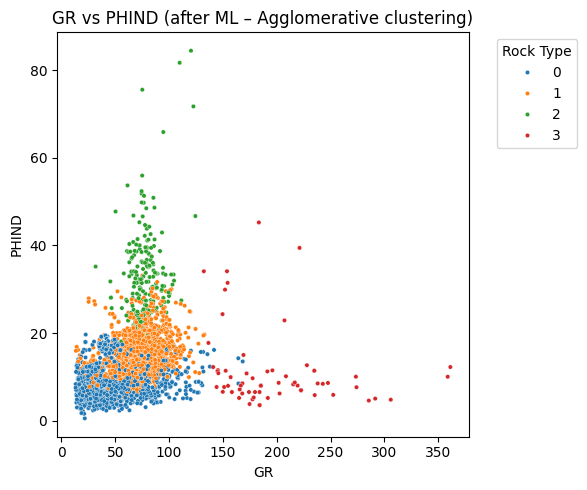

In [23]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=df["GR"],
    y=df["PHIND"],
    hue=df["RT_agg"],
    palette="tab10",
    s=10
)
plt.xlabel("GR")
plt.ylabel("PHIND")
plt.title("GR vs PHIND (after ML – Agglomerative clustering)")
plt.legend(title="Rock Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [24]:
# 2) Ubah jadi huruf A–D
map_to_letter = {0: "P1", 1: "P2", 2: "P3", 3: "P4"}

df["RT_km_letter"] = df["RT_km"].map(map_to_letter)
df["RT_gmm_letter"] = df["RT_gmm"].map(map_to_letter)
df["RT_agg_letter"] = df["RT_agg"].map(map_to_letter)

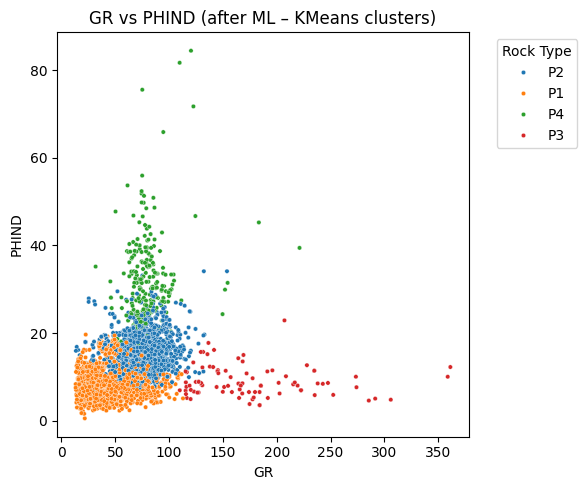

In [25]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=df["GR"],
    y=df["PHIND"],
    hue=df["RT_km_letter"],
    palette="tab10",
    s=10
)
plt.xlabel("GR")
plt.ylabel("PHIND")
plt.title("GR vs PHIND (after ML – KMeans clusters)")
plt.legend(title="Rock Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


new deep learning

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#2) Define features and label
feature_cols = ["GR", "ILD_log10", "DeltaPHI", "PHIND", "PE", "NM_M", "RELPOS"]
X = df[feature_cols].values
y = df["Facies"].values

# 3) Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# 4) Standardize logs (important for NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

KeyError: "['NM_M', 'RELPOS'] not in index"

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

num_features = X_train_scaled.shape[1]
num_classes = len(df["Facies"].unique())

model = keras.Sequential([
    layers.Input(shape=(num_features,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


In [ ]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    verbose=1
)

test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test accuracy:", test_acc)


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


**DL VS ML**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1) Load data
features = ["GR", "ILD_log10", "DeltaPHI", "PHIND", "PE", "NM_M", "RELPOS"]
X = df[features].values

# 2) Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Classical ML: k-means on scaled logs
k = 4
kmeans_ml = KMeans(n_clusters=k, random_state=0)
df["cluster_ml"] = kmeans_ml.fit_predict(X_scaled)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

n_features = X_scaled.shape[1]
latent_dim = 2   # for easy plotting

# Encoder
inputs = keras.Input(shape=(n_features,))
h = layers.Dense(16, activation="relu")(inputs)
latent = layers.Dense(latent_dim, activation="linear", name="latent")(h)

# Decoder
h_dec = layers.Dense(16, activation="relu")(latent)
outputs = layers.Dense(n_features, activation="linear")(h_dec)

autoencoder = keras.Model(inputs, outputs)
autoencoder.compile(optimizer="adam", loss="mse")

# Train
history = autoencoder.fit(
    X_scaled, X_scaled,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    verbose=0
)

# Get latent features
encoder = keras.Model(inputs, latent)
Z = encoder.predict(X_scaled)  # shape: (n_samples, 2)

# k-means on latent space
kmeans_dl = KMeans(n_clusters=k, random_state=0)
df["cluster_dl"] = kmeans_dl.fit_predict(Z)


In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(X_scaled[:,0], X_scaled[:,1],
            c=df["cluster_ml"], cmap="tab10", s=5)
plt.title("k-means on scaled logs (cluster_ml)")
plt.xlabel("Scaled GR")
plt.ylabel("Scaled ILD_log10")

plt.subplot(1,2,2)
plt.scatter(Z[:,0], Z[:,1],
            c=df["cluster_dl"], cmap="tab10", s=5)
plt.title("Autoencoder latent space + k-means (cluster_dl)")
plt.xlabel("Latent 1")
plt.ylabel("Latent 2")

plt.tight_layout()
plt.show()


In [ ]:
well = df["Well Name"].iloc[0]
one_well = df[df["Well Name"] == well]

plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.scatter(one_well["GR"], one_well["Depth"],
            c=one_well["cluster_ml"], cmap="tab10", s=5)
plt.gca().invert_yaxis()
plt.xlabel("GR")
plt.ylabel("Depth")
plt.title(f"{well} – k-means (cluster_ml)")

plt.subplot(1,2,2)
plt.scatter(one_well["GR"], one_well["Depth"],
            c=one_well["cluster_dl"], cmap="tab10", s=5)
plt.gca().invert_yaxis()
plt.xlabel("GR")
plt.ylabel("Depth")
plt.title(f"{well} – DL clusters (cluster_dl)")

plt.tight_layout()
plt.show()
